# CAR DAMAGE CLASSIFICATION





In [22]:
%%capture
!unzip /content/Accident_Class.zip

In [3]:
%%capture
!pip install datasets
!pip install transformers

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
from tensorflow.keras import layers

In [6]:
from tensorflow.keras import regularizers


In [7]:
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetB7

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.utils import to_categorical

In [9]:
def Plottings(history):
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  plt.plot(history.history['accuracy'], label='Training Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

In [10]:

def evaluate_model(model, val_generator):
    val_images, val_labels = [], []

    for i in range(len(val_generator)):
        images, labels = val_generator[i]
        val_images.extend(images)
        val_labels.extend(np.argmax(labels, axis=1))

    val_images = np.array(val_images)
    val_labels = np.array(val_labels)

    predictions = model.predict(val_images)
    y_pred = np.argmax(predictions, axis=1)
    y_true = val_labels

    # Confusion Matrix
    confusion_mat = confusion_matrix(y_true, y_pred)
    plot_confusion_matrix(confusion_mat)

    # Classification Report
    report = classification_report(y_true, y_pred, target_names=['minor', 'moderate', 'severe'])
    print('Classification Report:')
    print(report)

def plot_confusion_matrix(confusion_mat):
    class_names = ['minor', 'moderate', 'severe']
    fig, ax = plt.subplots()
    cax = ax.matshow(confusion_mat, cmap='Reds')
    cbar = fig.colorbar(cax)

    ax.set_xticklabels([''] + class_names, rotation=45)
    ax.set_yticklabels([''] + class_names)

    for i in range(confusion_mat.shape[0]):
        for j in range(confusion_mat.shape[1]):
            ax.text(j, i, str(confusion_mat[i, j]), ha='center', va='center')

    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()




In [ ]:
#!unzip  /content/Car_Damage_Severity_Dataset.zip

In [11]:
train_dir = '/content/Car_Damage_Severity_Dataset/training'
val_dir = '/content/Car_Damage_Severity_Dataset/validation'

In [13]:
img_width, img_height = 450, 450


In [14]:
image_size = (img_width, img_height)


In [15]:
epochs = 20
batch_size=3

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = ImageDataGenerator().flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1383 images belonging to 3 classes.
Found 248 images belonging to 3 classes.


In [ ]:
inputs = keras.Input(shape=image_size+(3,))
x = layers.Rescaling(1.0 / 255)(inputs)
x = layers.Conv2D(128, 3, strides=2, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.Conv2D(128, 3)(x)
x = layers.Activation("relu")(x)
x = layers.AveragePooling2D(pool_size=(2, 2))(x)
x=  layers.Flatten()(x)
x = Dense(128)(x)
x=  layers.LeakyReLU(alpha=0.02)(x)
x = layers.Dropout(0.2)(x)

output = layers.Dense(3, activation='softmax')(x)

model = keras.Model(inputs, output)

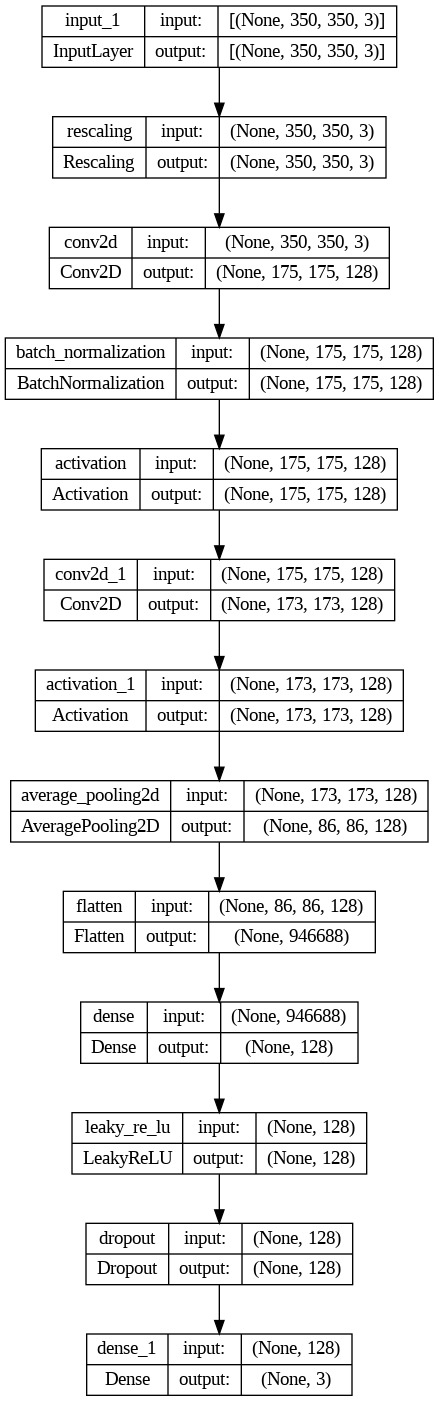

In [ ]:
keras.utils.plot_model(model, show_shapes=True)


In [ ]:


callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
]
model.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)


In [ ]:
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)

Epoch 1/20
461/461 [==============================] - 60s 129ms/step - loss: 1.0509 - accuracy: 0.4353 - val_loss: 1.0508 - val_accuracy: 0.3992
Epoch 2/20
461/461 [==============================] - 51s 111ms/step - loss: 1.0540 - accuracy: 0.4476 - val_loss: 1.0549 - val_accuracy: 0.4194
Epoch 3/20
461/461 [==============================] - 54s 116ms/step - loss: 1.0557 - accuracy: 0.4288 - val_loss: 0.9993 - val_accuracy: 0.4798
Epoch 4/20
461/461 [==============================] - 54s 116ms/step - loss: 1.0466 - accuracy: 0.4563 - val_loss: 0.9932 - val_accuracy: 0.4435
Epoch 5/20
461/461 [==============================] - 53s 116ms/step - loss: 1.0355 - accuracy: 0.4657 - val_loss: 0.9864 - val_accuracy: 0.5000
Epoch 6/20
461/461 [==============================] - 52s 112ms/step - loss: 1.0561 - accuracy: 0.4852 - val_loss: 1.0100 - val_accuracy: 0.4597
Epoch 7/20
461/461 [==============================] - 53s 116ms/step - loss: 1.0513 - accuracy: 0.4389 - val_loss: 0.9880 - val_ac

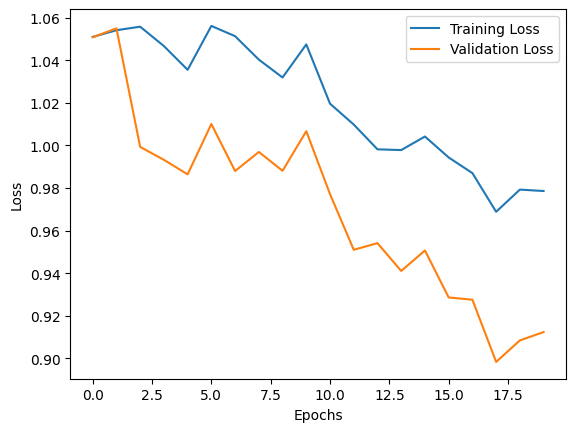

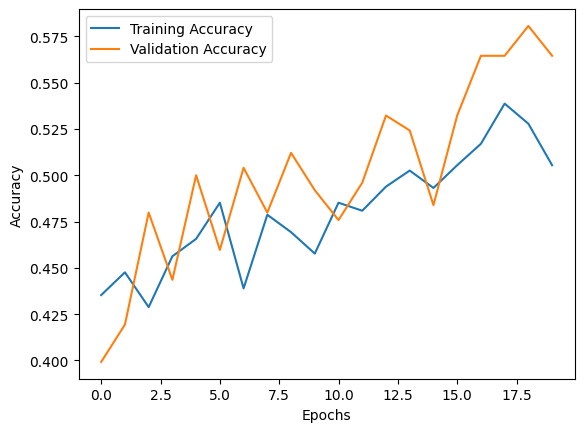

In [ ]:
Plottings(history)

8/8 [==============================] - 3s 196ms/step


<ipython-input-6-a58533f24bf0>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + class_names, rotation=45)
<ipython-input-6-a58533f24bf0>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + class_names)


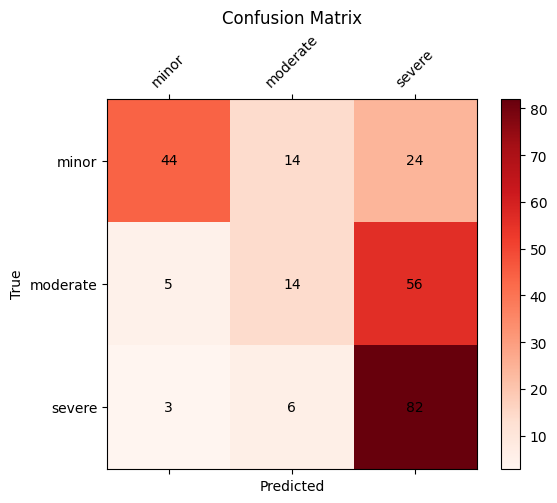

Classification Report:
              precision    recall  f1-score   support

       minor       0.85      0.54      0.66        82
    moderate       0.41      0.19      0.26        75
      severe       0.51      0.90      0.65        91

    accuracy                           0.56       248
   macro avg       0.59      0.54      0.52       248
weighted avg       0.59      0.56      0.53       248



In [ ]:

evaluate_model(model, val_generator)


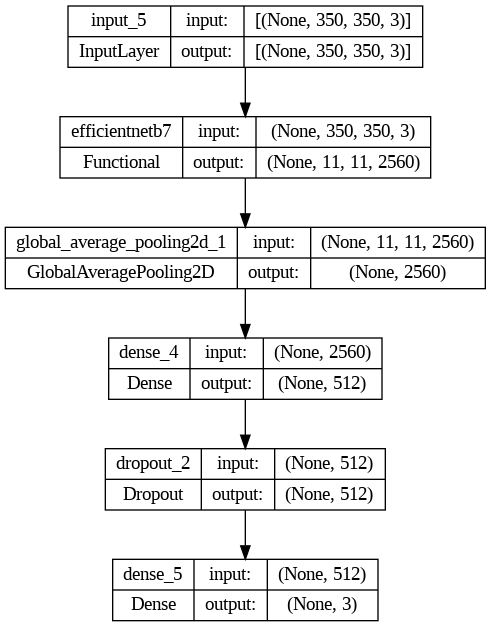

In [ ]:


base_model = EfficientNetB7(weights='imagenet', include_top=False, input_shape=image_size+(3,))
n_layers_to_unfreeze = 5

for layer in base_model.layers:
    layer.trainable = False

for layer in base_model.layers[-n_layers_to_unfreeze:]:
    layer.trainable = True
input_tensor = tf.keras.Input(shape=image_size+(3,))
x = layers.Rescaling(1.0 / 255)(input_tensor)

x = base_model(input_tensor)
x = layers.GlobalAveragePooling2D()(x)
x =Dense(512, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
                    bias_regularizer=regularizers.l1(0.006) ,activation='relu')(x)
x = layers.Dropout(0.2)(x)
output_tensor = layers.Dense(3, activation='softmax')(x)

model2 = Model(inputs=input_tensor, outputs=output_tensor)


keras.utils.plot_model(model2, show_shapes=True)


In [ ]:

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
]
model2.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

In [ ]:
history2 = model2.fit(train_generator, epochs=epochs, validation_data=val_generator)

Epoch 1/20
461/461 [==============================] - 103s 170ms/step - loss: 9.4625 - accuracy: 0.5076 - val_loss: 5.4834 - val_accuracy: 0.7137
Epoch 2/20
461/461 [==============================] - 71s 154ms/step - loss: 3.8623 - accuracy: 0.5973 - val_loss: 2.5164 - val_accuracy: 0.6734
Epoch 3/20
461/461 [==============================] - 72s 155ms/step - loss: 2.0555 - accuracy: 0.6146 - val_loss: 1.4570 - val_accuracy: 0.7339
Epoch 4/20
461/461 [==============================] - 71s 154ms/step - loss: 1.3991 - accuracy: 0.6204 - val_loss: 1.1105 - val_accuracy: 0.7056
Epoch 5/20
461/461 [==============================] - 71s 153ms/step - loss: 1.1576 - accuracy: 0.5951 - val_loss: 0.9299 - val_accuracy: 0.7298
Epoch 6/20
461/461 [==============================] - 70s 152ms/step - loss: 1.0461 - accuracy: 0.6233 - val_loss: 0.8726 - val_accuracy: 0.6976
Epoch 7/20
461/461 [==============================] - 75s 164ms/step - loss: 0.9812 - accuracy: 0.6435 - val_loss: 0.8323 - val_a

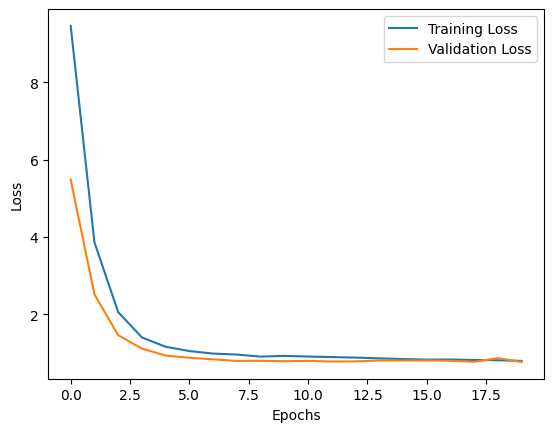

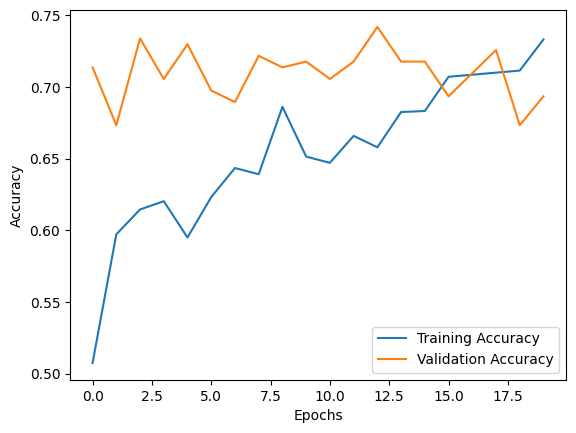

In [ ]:
Plottings(history2)

8/8 [==============================] - 12s 839ms/step


<ipython-input-6-a58533f24bf0>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + class_names, rotation=45)
<ipython-input-6-a58533f24bf0>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + class_names)


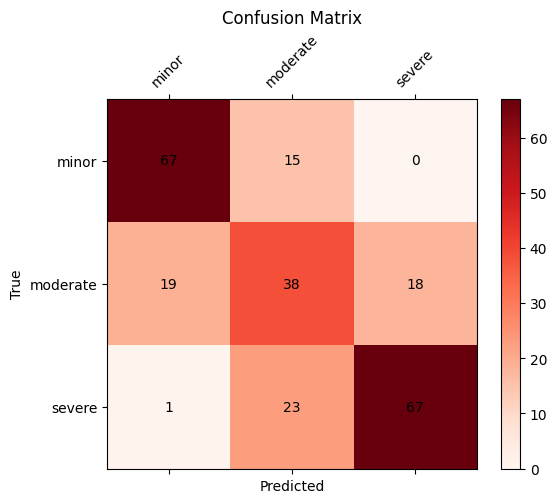

Classification Report:
              precision    recall  f1-score   support

       minor       0.77      0.82      0.79        82
    moderate       0.50      0.51      0.50        75
      severe       0.79      0.74      0.76        91

    accuracy                           0.69       248
   macro avg       0.69      0.69      0.69       248
weighted avg       0.70      0.69      0.69       248



In [ ]:
evaluate_model(model2, val_generator)


##VIT

In [16]:
import os
import datasets

def create_image_folder_dataset(root_path):
  """creates `Dataset` from image folder structure"""

  # get class names by folders names
  _CLASS_NAMES= os.listdir(root_path)
  # defines `datasets` features`
  features=datasets.Features({
                      "img": datasets.Image(),
                      "label": datasets.features.ClassLabel(names=_CLASS_NAMES),
                  })
  # temp list holding datapoints for creation
  img_data_files=[]
  label_data_files=[]
  # load images into list for creation
  for img_class in os.listdir(root_path):
    for img in os.listdir(os.path.join(root_path,img_class)):
      path_=os.path.join(root_path,img_class,img)
      img_data_files.append(path_)
      label_data_files.append(img_class)
  # create dataset
  ds = datasets.Dataset.from_dict({"img":img_data_files,"label":label_data_files},features=features)
  return ds



In [24]:
VIT_ds = create_image_folder_dataset("/content/training")


In [25]:
img_class_labels = VIT_ds.features["label"].names


In [26]:
img_class_labels

['03-severe', '01-minor', '02-moderate']

In [28]:
VIT_ds

Dataset({
    features: ['img', 'label'],
    num_rows: 1434
})

In [29]:
model_id = "google/vit-base-patch16-224-in21k"


In [30]:
from transformers import ViTFeatureExtractor
from tensorflow import keras
from tensorflow.keras import layers


feature_extractor = ViTFeatureExtractor.from_pretrained(model_id)

data_augmentation = keras.Sequential(
    [
        layers.Resizing(feature_extractor.size, feature_extractor.size),
        layers.Rescaling(1./255),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# use keras image data augementation processing
def augmentation(examples):
    # print(examples["img"])
    examples["pixel_values"] = [data_augmentation(image) for image in examples["img"]]
    return examples


# basic processing (only resizing)
def process(examples):
    examples.update(feature_extractor(examples['img'], ))
    return examples

# we are also renaming our label col to labels to use `.to_tf_dataset` later
VIT_ds = VIT_ds.rename_column("label", "labels")








preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [31]:
processed_dataset = VIT_ds.map(process, batched=True)
processed_dataset




Map:   0%|          | 0/1434 [00:00<?, ? examples/s]

Dataset({
    features: ['img', 'labels', 'pixel_values'],
    num_rows: 1434
})

In [32]:
test_size=.2

processed_dataset = processed_dataset.shuffle().train_test_split(test_size=test_size)


In [33]:
from huggingface_hub import HfFolder
import tensorflow as tf

id2label = {str(i): label for i, label in enumerate(img_class_labels)}
label2id = {v: k for k, v in id2label.items()}

num_train_epochs = 7
train_batch_size = 2
eval_batch_size = 2
learning_rate = 3e-5
weight_decay_rate=0.01
num_warmup_steps=0
output_dir=model_id.split("/")[1]






In [34]:
from transformers import DefaultDataCollator

# Data collator that will dynamically pad the inputs received, as well as the labels.
data_collator = DefaultDataCollator(return_tensors="tf")

# converting our train dataset to tf.data.Dataset
tf_train_dataset = processed_dataset["train"].to_tf_dataset(
   columns=['pixel_values'],
   label_cols=["labels"],
   shuffle=True,
   batch_size=train_batch_size,
   collate_fn=data_collator)

# converting our test dataset to tf.data.Dataset
tf_eval_dataset = processed_dataset["test"].to_tf_dataset(
   columns=['pixel_values'],
   label_cols=["labels"],
   shuffle=True,
   batch_size=eval_batch_size,
   collate_fn=data_collator)


/usr/local/lib/python3.10/dist-packages/datasets/arrow_dataset.py:399: FutureWarning: The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 
  warnings.warn(


In [35]:
from transformers import TFViTForImageClassification, create_optimizer
from transformers import ViTForImageClassification, create_optimizer

import tensorflow as tf

# create optimizer wight weigh decay
num_train_steps = len(tf_train_dataset) * num_train_epochs
optimizer, lr_schedule = create_optimizer(
    init_lr=learning_rate,
    num_train_steps=num_train_steps,
    weight_decay_rate=weight_decay_rate,
    num_warmup_steps=num_warmup_steps,
)

# load pre-trained ViT model
model = TFViTForImageClassification.from_pretrained(
    model_id,
    num_labels=len(img_class_labels),
    id2label=id2label,
    label2id=label2id,

)



# compile model
model.compile(optimizer=optimizer,
              loss="binary_crossentropy",
               metrics=["accuracy"],

              )


config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some layers from the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing TFViTForImageClassification: ['vit/pooler/dense/kernel:0', 'vit/pooler/dense/bias:0']
- This IS expected if you are initializing TFViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [36]:
import os
from transformers.keras_callbacks import PushToHubCallback
from tensorflow.keras.callbacks import TensorBoard as TensorboardCallback, EarlyStopping

callbacks=[]

callbacks.append(TensorboardCallback(log_dir=os.path.join(output_dir,"logs")))
callbacks.append(EarlyStopping(monitor="val_accuracy",patience=1))


In [38]:
train_results = model.fit(
    tf_train_dataset,
    validation_data=tf_eval_dataset,
    callbacks=callbacks,
    epochs=20,
)

Epoch 1/20
574/574 [==============================] - 367s 631ms/step - loss: 0.0161 - accuracy: 0.2964 - val_loss: 0.0151 - val_accuracy: 0.2404
Epoch 2/20
574/574 [==============================] - 347s 604ms/step - loss: -0.6963 - accuracy: 0.2903 - val_loss: 1.0033 - val_accuracy: 0.3240
Epoch 3/20
574/574 [==============================] - 360s 627ms/step - loss: -1.1641 - accuracy: 0.3060 - val_loss: -1.5500 - val_accuracy: 0.3589
Epoch 4/20
574/574 [==============================] - 337s 587ms/step - loss: -1.5961 - accuracy: 0.3261 - val_loss: 0.0332 - val_accuracy: 0.2962


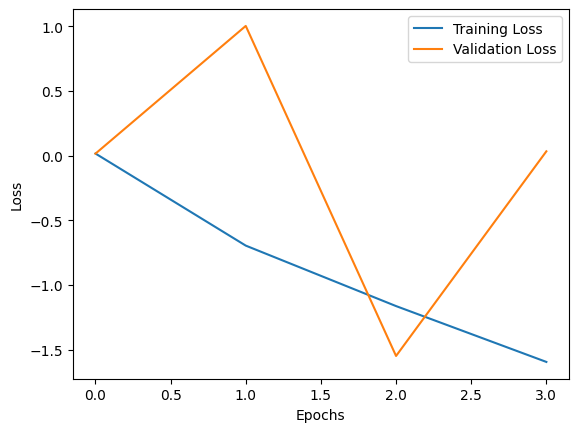

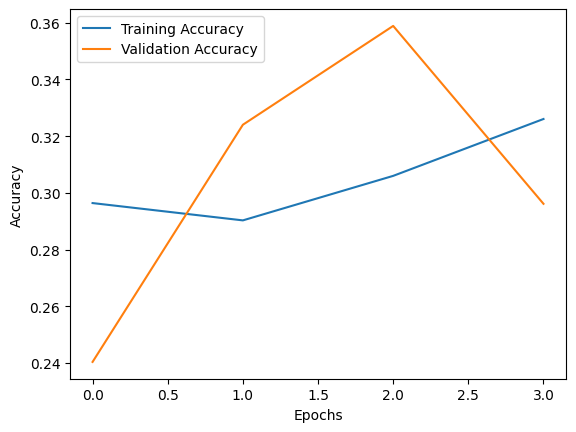

In [39]:
Plottings(train_results)